# By: Saurabh Anil Pandey

# TASK #3 Prediction using Decision Tree Algorithm
# GRIP: The Sparks Foundation

# Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_text, export_graphviz
from graphviz import Source
from IPython.display import display, SVG 
from sklearn.metrics import accuracy_score, confusion_matrix

# Loading  data

In [2]:
#loading the csv file
iris_data =  pd.read_csv('Iris.csv')

# Exploring Iris Dataset

In [3]:
#Checking shape of data
iris_data.shape

(150, 6)

In [4]:
iris_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
#Checking for null values
iris_data.isna().any()

Id               False
SepalLengthCm    False
SepalWidthCm     False
PetalLengthCm    False
PetalWidthCm     False
Species          False
dtype: bool

In [7]:
#Getting Quick statistical insights about data
iris_data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [8]:
#Population of respective species in dataset
iris_data['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

## Insights from Data
* There are 150 observation of 6 features
* Data is free of null values

## Data Visualization

In [9]:
def plot_hist(x, axes):
    sns.distplot(x, ax = axes, hist = False, color='red')
    axes.set_title(x.name+' Distribution')

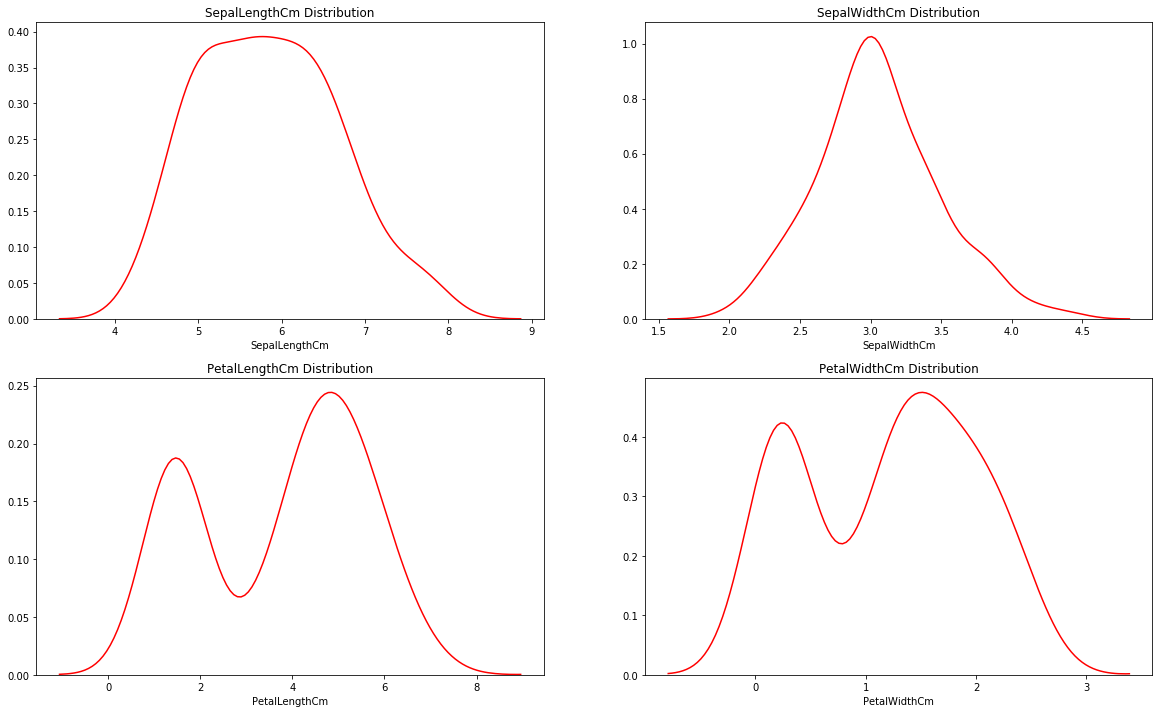

In [10]:
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize=(20,12))
plot_hist(iris_data.SepalLengthCm, ax[0][0],)
plot_hist(iris_data.SepalWidthCm, ax[0][1])
plot_hist(iris_data.PetalLengthCm, ax[1][0])
plot_hist(iris_data.PetalWidthCm, ax[1][1])

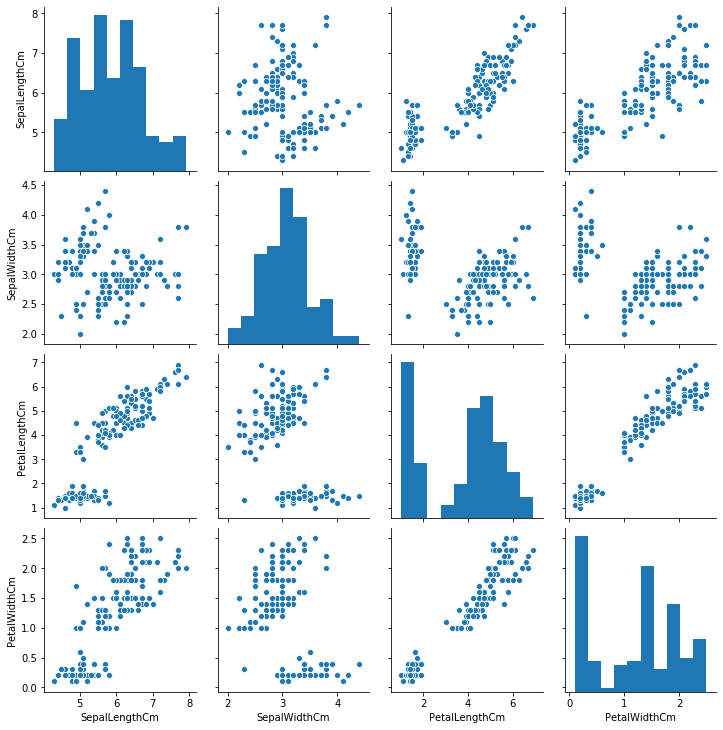

In [11]:
sns.pairplot(iris_data.iloc[:,[1,2,3,4]])

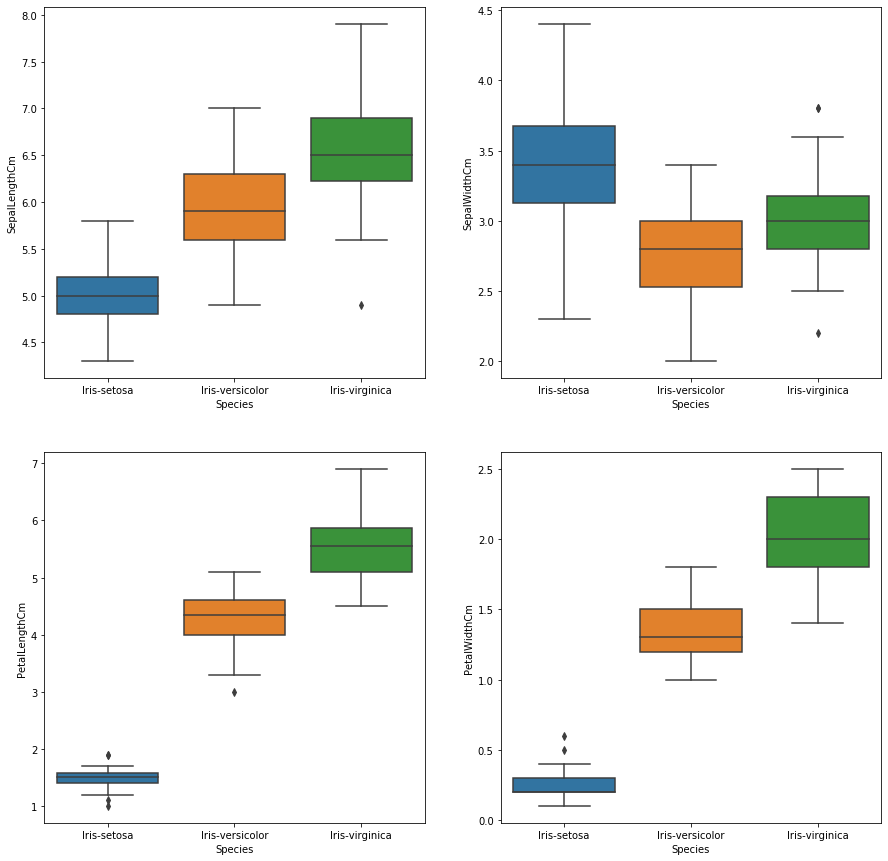

In [12]:
fig, ax =  plt.subplots(nrows=2, ncols=2, figsize=(15,15))
sns.boxplot(iris_data.iloc[:,5], iris_data.iloc[:,1], ax=ax[0][0])
sns.boxplot(iris_data.iloc[:,5], iris_data.iloc[:,2], ax=ax[0][1])
sns.boxplot(iris_data.iloc[:,5], iris_data.iloc[:,3], ax=ax[1][0])
sns.boxplot(iris_data.iloc[:,5], iris_data.iloc[:,4], ax=ax[1][1])

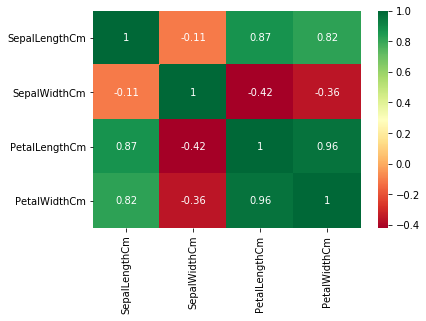

In [13]:
sns.heatmap(iris_data.iloc[:,[1,2,3,4]].corr(), annot=True, cmap='RdYlGn')

# Data Preprocessing

In [14]:
#Extracting features and labels
X = iris_data.iloc[:,[1,2,3,4]].values
y = iris_data.iloc[:,-1].values

#Spliting up train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Training model

In [15]:
#Defining model
model =  DecisionTreeClassifier(random_state=0)
#fit the training data
model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

# Testing the model

In [16]:
y_pred = model.predict(X_test)

print('Test Accuracy is: ',accuracy_score(y_test, y_pred)*100)

Test Accuracy is:  100.0


# Visualizing the decision tree

In [17]:
r = export_text(model)
print(r)

|--- feature_3 <= 0.80
|   |--- class: Iris-setosa
|--- feature_3 >  0.80
|   |--- feature_3 <= 1.75
|   |   |--- feature_2 <= 4.95
|   |   |   |--- feature_3 <= 1.65
|   |   |   |   |--- class: Iris-versicolor
|   |   |   |--- feature_3 >  1.65
|   |   |   |   |--- class: Iris-virginica
|   |   |--- feature_2 >  4.95
|   |   |   |--- feature_3 <= 1.55
|   |   |   |   |--- class: Iris-virginica
|   |   |   |--- feature_3 >  1.55
|   |   |   |   |--- feature_2 <= 5.45
|   |   |   |   |   |--- class: Iris-versicolor
|   |   |   |   |--- feature_2 >  5.45
|   |   |   |   |   |--- class: Iris-virginica
|   |--- feature_3 >  1.75
|   |   |--- feature_2 <= 4.85
|   |   |   |--- feature_1 <= 3.10
|   |   |   |   |--- class: Iris-virginica
|   |   |   |--- feature_1 >  3.10
|   |   |   |   |--- class: Iris-versicolor
|   |   |--- feature_2 >  4.85
|   |   |   |--- class: Iris-virginica



In [18]:
graph = Source(export_graphviz(model, out_file=None, 
                               feature_names=iris_data.columns[1:5],
                               class_names=iris_data.iloc[:,5].unique(),
                               filled = True))

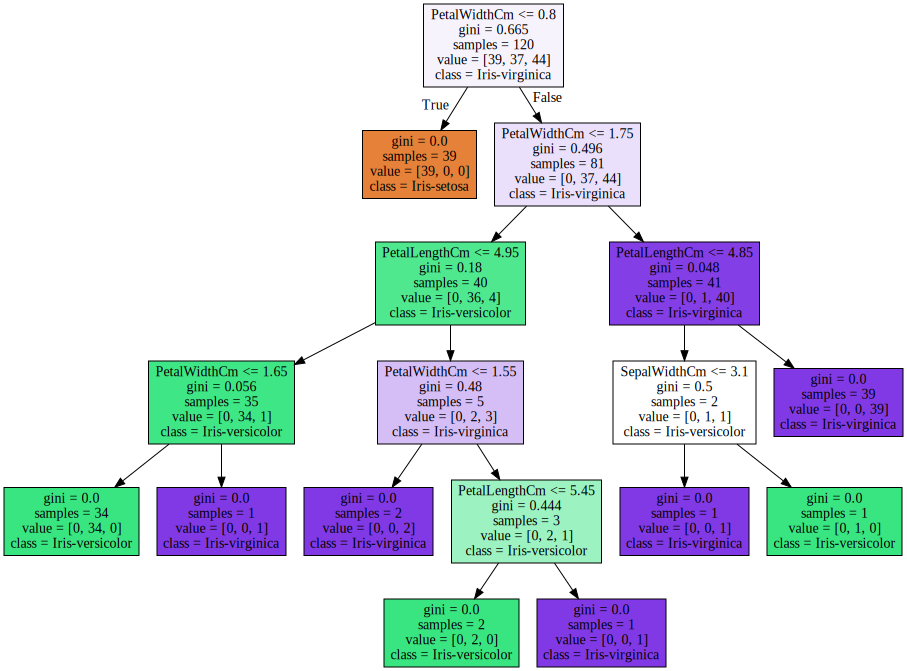

In [19]:
display(SVG(graph.pipe(format='svg')))

# Predict the class

In [20]:
#Enter the Sepal length, Sepal width, Petal length and Petal width in centimeters respectively
sl, sw, pl, pw = map(float, input().split(' '))

1.2 3.4 5.6 8.9


In [21]:
print('This flower belongs to',model.predict([[pw, pl, sw, sl]])[0])

This flower belongs to Iris-versicolor
